In [98]:
#%matplotlib notebook
%matplotlib inline
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, sys
display(HTML("<style>.container { width:100% !important; }</style>"))

In [99]:
# BASELINE
# TFIDF
# SICK_VERBADJNOUN_lemma	0.611	0.091		# TFIDF
# SICK_ADJNOUN_lemma	0.558	0.111			# TFIDF
# SICK_VERBADJNOUN_orth	0.568	0.106		# TFIDF
# SICK_ADJNOUN_orth	0.542	0.119			# TFIDF

In [100]:
sick_test = pd.DataFrame.from_csv('SA_results/SICK_test_annotated.txt', sep='\t', header=0)
sick_test_overlap = pd.DataFrame.from_csv('SA_results/semeval_overlap_test.tsv', sep='\t', header=0)
sick_test['relatedness_score'].corr(sick_test_overlap['relatedness_score'])
#0.62701073200106172

0.62701073200106172

In [130]:
results_all = pd.DataFrame.from_csv('SA_results/scores_all.tsv', sep='\t', index_col=['crossfold_id','dev_file_index'])
results_all['dependency available'] = results_all.apply(lambda row: 'NO' if 'blanked' in row.train_data_path else 'YES', axis=1)
results_all['order aware'] = results_all.apply(lambda row: 'YES' if 'LSTM' in row.tree_embedder else 'NO', axis=1)
results_all['pearson_tfidf'] = 0.618864
#results_all.set_index(['crossfold_id','dev_file_index'])
results_all

clipping      optimizer  early_stop_queue  \
crossfold_id dev_file_index                                              
0            0                      5  AdamOptimizer                25   
             1                      5  AdamOptimizer                25   
             2                      5  AdamOptimizer                25   
             3                      5  AdamOptimizer                25   
             4                      5  AdamOptimizer                25   
1            0                      5  AdamOptimizer                25   
             1                      5  AdamOptimizer                25   
             2                      5  AdamOptimizer                25   
             3                      5  AdamOptimizer                25   
             4                      5  AdamOptimizer                25   
2            0                      5  AdamOptimizer                25   
             1                      5  AdamOptimizer                25   
             2                      5  AdamOptimizer                25   
             3                      5  AdamOptimizer                25   
             4                      5  AdamOptimizer                25   
3            0                      5  AdamOptimizer                25   
             1                      5  AdamOptimizer                25   
             2                      5  AdamOptimizer                25   
             3                      5  AdamOptimizer                25   
             4                      5  AdamOptimizer                25   
4            0                      5  AdamOptimizer                25   
             1                      5  AdamOptimizer                25   
             2                      5  AdamOptimizer                25   
             3                      5  AdamOptimizer                25   
             4                      5  AdamOptimizer                25   
5            0                      5  AdamOptimizer                25   
             1                      5  AdamOptimizer                25   
             2                      5  AdamOptimizer                25   
             3                      5  AdamOptimizer                25   
             4                      5  AdamOptimizer                25   
...                               ...            ...               ...   
4            0                      5  AdamOptimizer                25   
             1                      5  AdamOptimizer                25   
             2                      5  AdamOptimizer                25   
             3                      5  AdamOptimizer                25   
             4                      5  AdamOptimizer                25   
5            0                      5  AdamOptimizer                25   
             1                      5  AdamOptimizer                25   
             2                      5  AdamOptimizer                25   
             3                      5  AdamOptimizer                25   
             4                      5  AdamOptimizer                25   
6            0                      5  AdamOptimizer                25   
             1                      5  AdamOptimizer                25   
             2                      5  AdamOptimizer                25   
             3                      5  AdamOptimizer                25   
             4                      5  AdamOptimizer                25   
7            0                      5  AdamOptimizer                25   
             1                      5  AdamOptimizer                25   
             2                      5  AdamOptimizer                25   
             3                      5  AdamOptimizer                25   
             4                      5  AdamOptimizer                25   
8            0                      5  AdamOptimizer                25   
             1                   

In [131]:
res = results_all[['dependency available', 'order aware', 'score_dev_best', 'score_test', 'pearson_tfidf']].rename(columns={'score_test': 'pearson'})
res[['pearson']]

pearson
crossfold_id dev_file_index          
0            0               0.839254
             1               0.839310
             2               0.839911
             3               0.831241
             4               0.836960
1            0               0.833624
             1               0.837838
             2               0.840332
             3               0.840797
             4               0.836510
2            0               0.837366
             1               0.839278
             2               0.842259
             3               0.837552
             4               0.838057
3            0               0.838589
             1               0.833261
             2               0.841757
             3               0.842540
             4               0.839392
4            0               0.839947
             1               0.837948
             2               0.837113
             3               0.835943
             4               0.841716
5            0               0.841651
             1               0.835965
             2               0.840095
             3               0.840155
             4               0.838425
...                               ...
4            0               0.840069
             1               0.838562
             2               0.836883
             3               0.835408
             4               0.838668
5            0               0.837218
             1               0.841498
             2               0.839139
             3               0.836767
             4               0.835403
6            0               0.838418
             1               0.842531
             2               0.839218
             3               0.835726
             4               0.837932
7            0               0.838028
             1               0.839844
             2               0.837932
             3               0.837821
             4               0.836198
8            0               0.838034
             1               0.839159
             2               0.839382
             3               0.836521
             4               0.839243
9            0               0.839721
             1               0.841511
             2               0.840664
             3               0.837867
             4               0.837321

[200 rows x 1 columns]

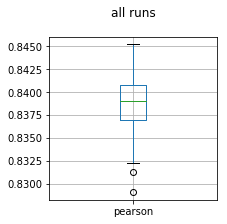

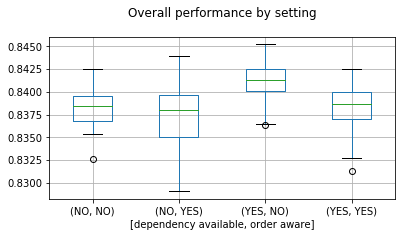

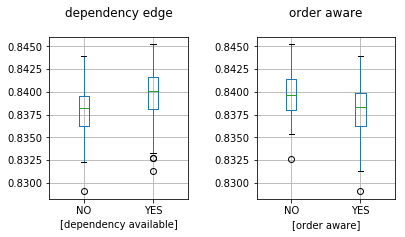

In [137]:
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 
images = {}
figsize = (6, 3)
bp = res.boxplot(column=['pearson'], figsize=(figsize[0] / 2, figsize[1]))
fig_merged = bp.get_figure()
plt.title('all runs')
images['pearson_all_merged'] = fig_merged

bp = res.boxplot(column=['pearson'], by=['dependency available', 'order aware'], figsize=figsize)
plt.title('Overall performance by setting')
fig_all = bp.get_figure()
fig_all.suptitle('')
images['pearson_all'] = fig_all
#fig_all = plt.figure(figsize=(15, 5))
fig_sep, axs = plt.subplots(1,2, figsize=figsize)
#bp = res.boxplot(column=['pearson'], by=['dependency available', 'order aware'], ax=axs[0])
bp1 = res.boxplot(column=['pearson'], by=['dependency available'], ax=axs[0])
axs[0].set_title('dependency edge')
bp2 = res.boxplot(column=['pearson'], by=['order aware'], ax=axs[1])
axs[1].set_title('order aware')
fig_sep.suptitle('')
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.subplots_adjust(wspace=0.5)
images['pearson_all_sep'] = fig_sep




In [138]:
import subprocess
path = "SA_results/images"
for name in images:
    p = os.path.join(path, name)
    # save figure as svg
    images[name].savefig('%s.svg' % p)
    # convert for latex
    subprocess.call(['inkscape','-D','-z','--file=%s.svg' % p, '--export-pdf=%s.pdf' % p, '--export-latex'])
    print('finished %s' % p)

finished SA_results/images/pearson_all_merged
finished SA_results/images/pearson_all_sep
finished SA_results/images/pearson_all


In [125]:
print('mean: %f' % res[['pearson']].mean().values[0])
print('std: %f' % res[['pearson']].std().values[0])

df = res.set_index(['dependency available', 'order aware'])[['pearson']]
gp = df.groupby(level=('dependency available', 'order aware'))
means = gp.mean()
print(means)
errors = gp.std()
print(errors)
#fig, ax = plt.subplots()
#means.plot.bar(yerr=errors, ax=ax)


#for title, group in gp:
#    group.hist()

mean: 0.838813
std: 0.002867
                                   pearson
dependency available order aware          
NO                   NO           0.838180
                     YES          0.837504
YES                  NO           0.841277
                     YES          0.838293
                                   pearson
dependency available order aware          
NO                   NO           0.001873
                     YES          0.003102
YES                  NO           0.002149
                     YES          0.002647
